In [1]:
#Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
#Step 2: Load Dataset
iris_df = sns.load_dataset("iris")

In [4]:
iris_df["species"].value_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
print("First 5 rows of dataset:")
print(iris_df.head())


First 5 rows of dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [7]:
#Step 3: Data Preprocessing
#Extract only numeric features (drop species).
X = iris_df.drop('species', axis=1)
#Standardize data (important for K-Means).
#Why Standardization?
# Features like petal length (~5 cm) and sepal width (~3 cm) are on different scales.
# K-Means is distance-based, so scaling ensures fair contribution of each feature.
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


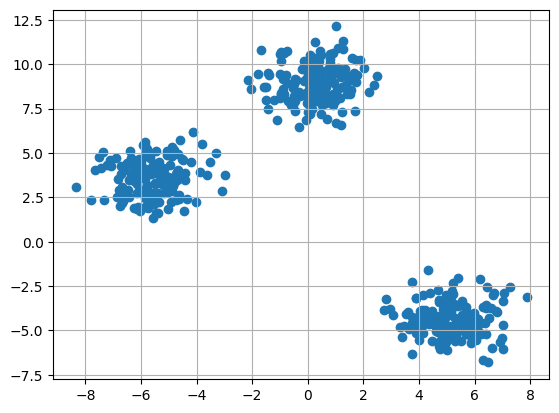

In [8]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()


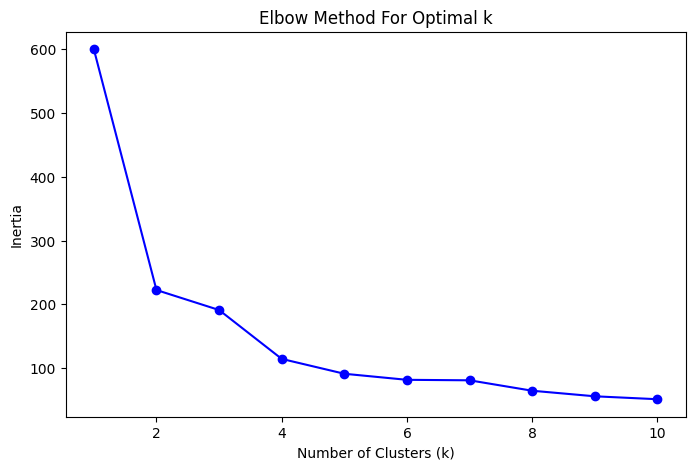

In [9]:
#Step 4: Apply Elbow Method
#The Elbow Method helps decide the optimal k.
inertia = []
K = range(1, 11)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)
# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
#Step 5: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['Cluster'] = kmeans.fit_predict(X_scaled)
print("\nCluster labels added:")
print(iris_df.head())



Cluster labels added:
   sepal_length  sepal_width  petal_length  petal_width species  Cluster
0           5.1          3.5           1.4          0.2  setosa        1
1           4.9          3.0           1.4          0.2  setosa        2
2           4.7          3.2           1.3          0.2  setosa        2
3           4.6          3.1           1.5          0.2  setosa        2
4           5.0          3.6           1.4          0.2  setosa        1


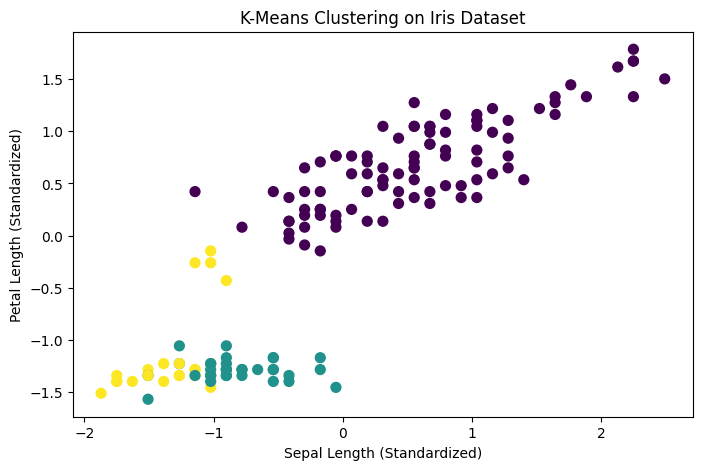

In [11]:
# Step 6: Visualization of Clusters (Using 1st and 3rd features)
plt.figure(figsize=(8, 5))
plt.scatter(
X_scaled[:, 0], X_scaled[:, 2], # 1st feature (Sepal Length), 3rd feature (Petal Length)
c=iris_df['Cluster'], cmap='viridis', s=50
)
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Sepal Length (Standardized)")
plt.ylabel("Petal Length (Standardized)")
plt.show()
